In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import charset_normalizer
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fuel-concumption-ratings-2023/Fuel Consumption Ratings 2023.csv


Detecting the type of encoding

In [6]:
with open('/kaggle/input/fuel-concumption-ratings-2023/Fuel Consumption Ratings 2023.csv','rb') as raw:
    result = charset_normalizer.detect(raw.read(1000000))
    print(result)

{'encoding': 'windows-1250', 'language': 'Italian', 'confidence': 1.0}


In [7]:
fuel = pd.read_csv('/kaggle/input/fuel-concumption-ratings-2023/Fuel Consumption Ratings 2023.csv',encoding='windows-1250')

In [8]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        841 non-null    object 
 1   Make                        854 non-null    object 
 2   Model                       833 non-null    object 
 3   Vehicle Class               833 non-null    object 
 4   Engine Size (L)             833 non-null    float64
 5   Cylinders                   833 non-null    float64
 6   Transmission                833 non-null    object 
 7   Fuel Type                   833 non-null    object 
 8   Fuel Consumption (L/100Km)  833 non-null    float64
 9   Hwy (L/100 km)              833 non-null    float64
 10  Comb (L/100 km)             833 non-null    float64
 11  Comb (mpg)                  833 non-null    float64
 12  CO2 Emissions (g/km)        833 non-null    float64
 13  CO2 Rating                  833 non

Text(0.5, 1.0, 'Missing Data')

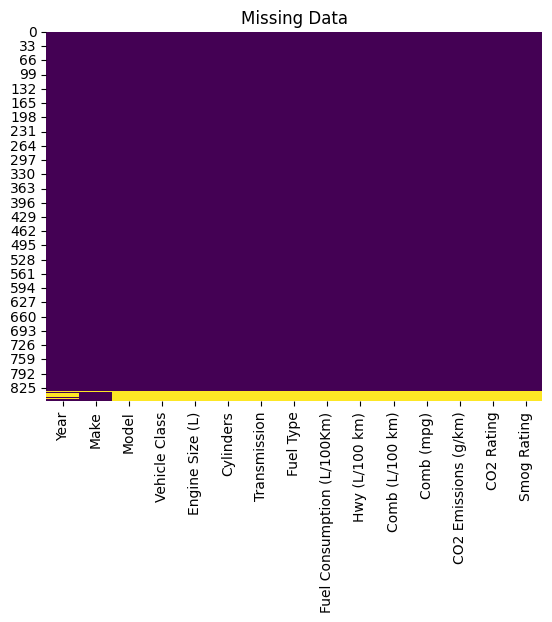

In [13]:
sns.heatmap(fuel.isnull(),cmap='viridis',cbar=False)
plt.title('Missing Data')

In [15]:
fuel.isnull().sum()

Year                          15
Make                           2
Model                         23
Vehicle Class                 23
Engine Size (L)               23
Cylinders                     23
Transmission                  23
Fuel Type                     23
Fuel Consumption (L/100Km)    23
Hwy (L/100 km)                23
Comb (L/100 km)               23
Comb (mpg)                    23
CO2 Emissions (g/km)          23
CO2 Rating                    23
Smog Rating                   23
dtype: int64

There is data missing; removing these.

In [16]:
fuel.dropna(inplace=True)

In [17]:
fuel.shape

(833, 15)

There are 833 rows and 15 columns

In [18]:
fuel.columns

Index(['Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption (L/100Km)',
       'Hwy (L/100 km)', 'Comb (L/100 km)', 'Comb (mpg)',
       'CO2 Emissions (g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

Goal - Create a machine model to predict CO2 emissions.

In [24]:
fuel['Fuel Consumption (L/100Km)'].corr(fuel['CO2 Emissions (g/km)'])

0.9584261742699053

In [29]:
fuel['Cylinders'].corr(fuel['CO2 Emissions (g/km)'])

0.81419872915496

There is a strong positive correlation between fuel consumption and CO2 rating.
There is a strong positive correlation between Cylinders and CO2 rating.

Going to use both to predict the CO2 rating.

Text(0.5, 1.0, 'Regression plot')

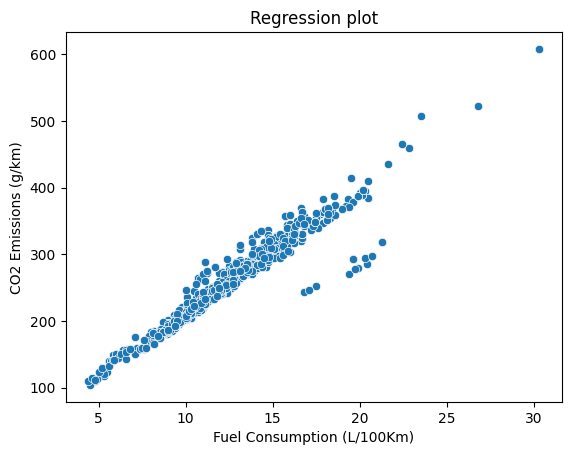

In [25]:
sns.scatterplot(data=fuel,x='Fuel Consumption (L/100Km)',y='CO2 Emissions (g/km)')
plt.title('Regression plot')

In [28]:
train_X,test_X,var_y,test_y = train_test_split(fuel[['Fuel Consumption (L/100Km)','Cylinders']],fuel['CO2 Emissions (g/km)'],test_size=0.25)
model = LinearRegression()
model.fit(train_X,var_y)
y_pred = model.predict(test_X)

In [32]:
error =mean_absolute_error(y_pred,test_y)
print(error)

10.536943732696953


An error of 10.53 is low; meaning that fuel consumption and cylinders can be used to predict CO2 emission.

In [36]:
print(model.predict([[30,4
                    ],[30,5]]))

[540.84163822 543.05568199]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
fuel.head()

,Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption (L/100Km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),CO2 Rating,Smog Rating
0,2023,Acura,Integra,Full-size,1.5,4.0,AV7,Z,7.9,6.3,7.2,39.0,167.0,6.0,7.0
1,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,AV7,Z,8.1,6.5,7.4,38.0,172.0,6.0,7.0
2,2023,Acura,Integra A-SPEC,Full-size,1.5,4.0,M6,Z,8.9,6.5,7.8,36.0,181.0,6.0,6.0
3,2023,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
4,2023,Acura,MDX SH-AWD Type S,SUV: Standard,3.0,6.0,AS10,Z,13.8,11.2,12.4,23.0,291.0,4.0,5.0
